In [ ]:
# Download the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 22.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Summary for categorical fetures
categorical = df.select_dtypes(include='object')
categorical.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
categorical.describe()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
categorical.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


### Data cleaning

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.duplicated().sum()

0

In [ ]:
missing_values = df.isna().sum()

missing_percentage = ((df.isna().sum() / len(df)) * 100).round(2)

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data

,Missing Values,Percentage
show_id,0,0.00
type,0,0.00
title,0,0.00
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
release_year,0,0.00
rating,4,0.05
duration,3,0.03


In [ ]:
# Handling missing values

df['director'].replace(np.nan, 'No Data', inplace=True)

df['cast'].replace(np.nan, 'No Data', inplace=True)

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

df.loc[(df['type'] == 'Movie') & (df['rating'].isna()), 'rating'] = movie_rating
df.loc[(df['type'] == 'TV Show') & (df['rating'].isna()), 'rating'] = tv_rating

In [ ]:
movie_duration_mode = df.loc[df['type'] == 'Movie', 'duration'].mode()[0]
tv_duration_mode = df.loc[df['type'] == 'TV Show', 'duration'].mode()[0]

df.loc[(df['type'] == 'Movie') & (df['duration'].isna()), 'duration'] = movie_duration_mode
df.loc[(df['type'] == 'TV Show') & (df['duration'].isna()), 'duration'] = tv_duration_mode

In [ ]:
# Not sure if i should drop the remaining missing values or not
len(df), df.isna().sum().sum(), f"{df.isna().sum().sum()/len(df)} %"

(8807, 10, '0.0011354604292040423 %')

In [ ]:
# we can safely drop the the rows
df.dropna(inplace=True)

In [ ]:
len(df), df.isna().sum().sum(), f"{df.isna().sum().sum()/len(df)} %"

(8797, 0, '0.0 %')

### EDA

In [ ]:
sns.set(style='darkgrid')

In [ ]:
rating_df = pd.DataFrame(df['rating'].value_counts())
rating_df.reset_index(inplace=True)
rating_df

,rating,count
0,TV-MA,3209
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


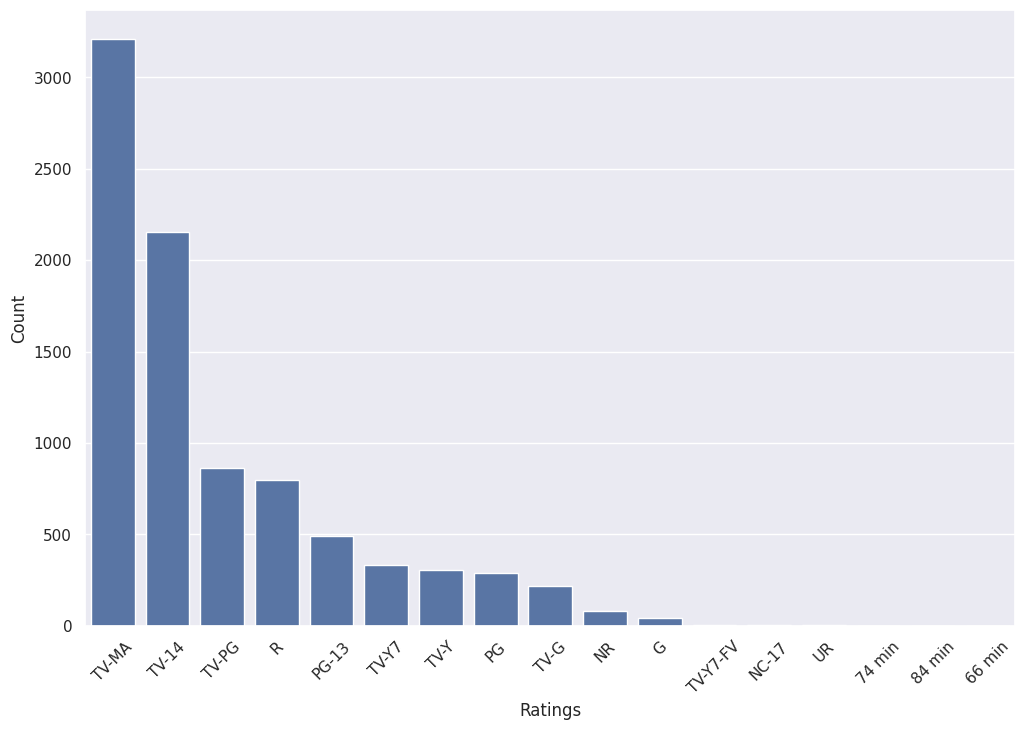

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=rating_df, x='rating',y='count')
plt.xticks(rotation=45)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

* Here we can see that the values 74 min, 84 min and 66 min don't really belong in the rating column
* So we can club them together with UR (Unrated column)

In [ ]:
df['rating'] = np.where(df['rating'].isin(['74 min', '84 min', '66 min']), 'UR', df['rating'])

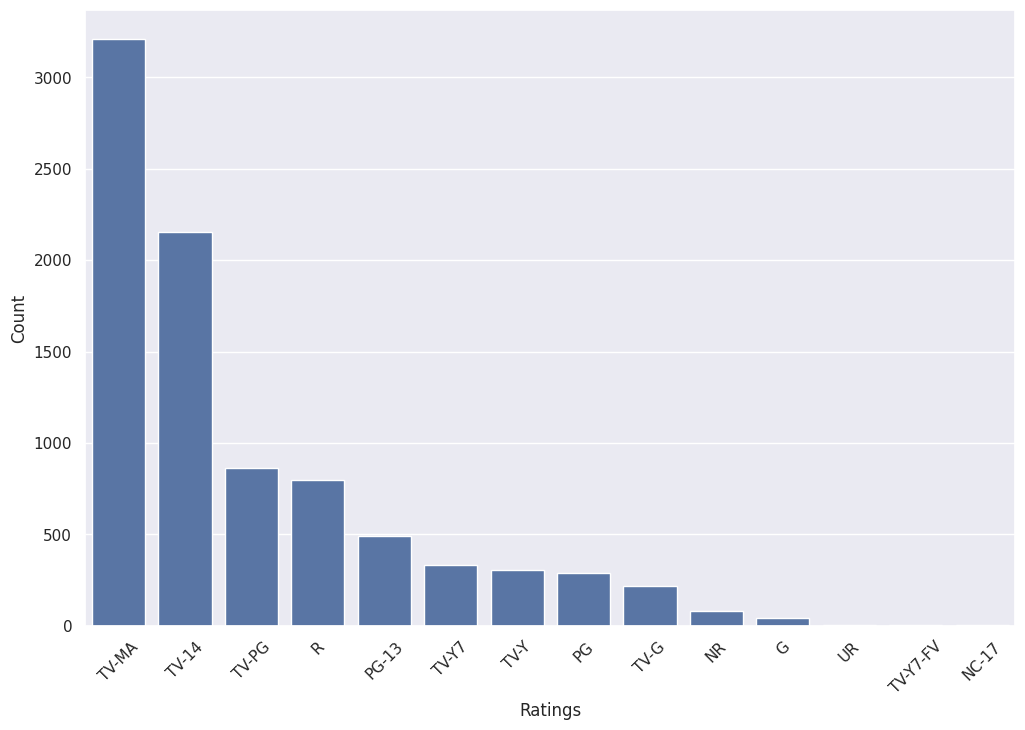

In [ ]:
# After performing replacement

rating_df = pd.DataFrame(df['rating'].value_counts())
rating_df.reset_index(inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(data=rating_df, x='rating',y='count')
plt.xticks(rotation=45)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [ ]:
release_year_df = pd.DataFrame(df['release_year'].value_counts())
release_year_df.reset_index(inplace=True)
release_year_df

,release_year,count
0,2018,1146
1,2017,1032
2,2019,1030
3,2020,953
4,2016,901
...,...,...
69,1959,1
70,1925,1
71,1961,1
72,1947,1


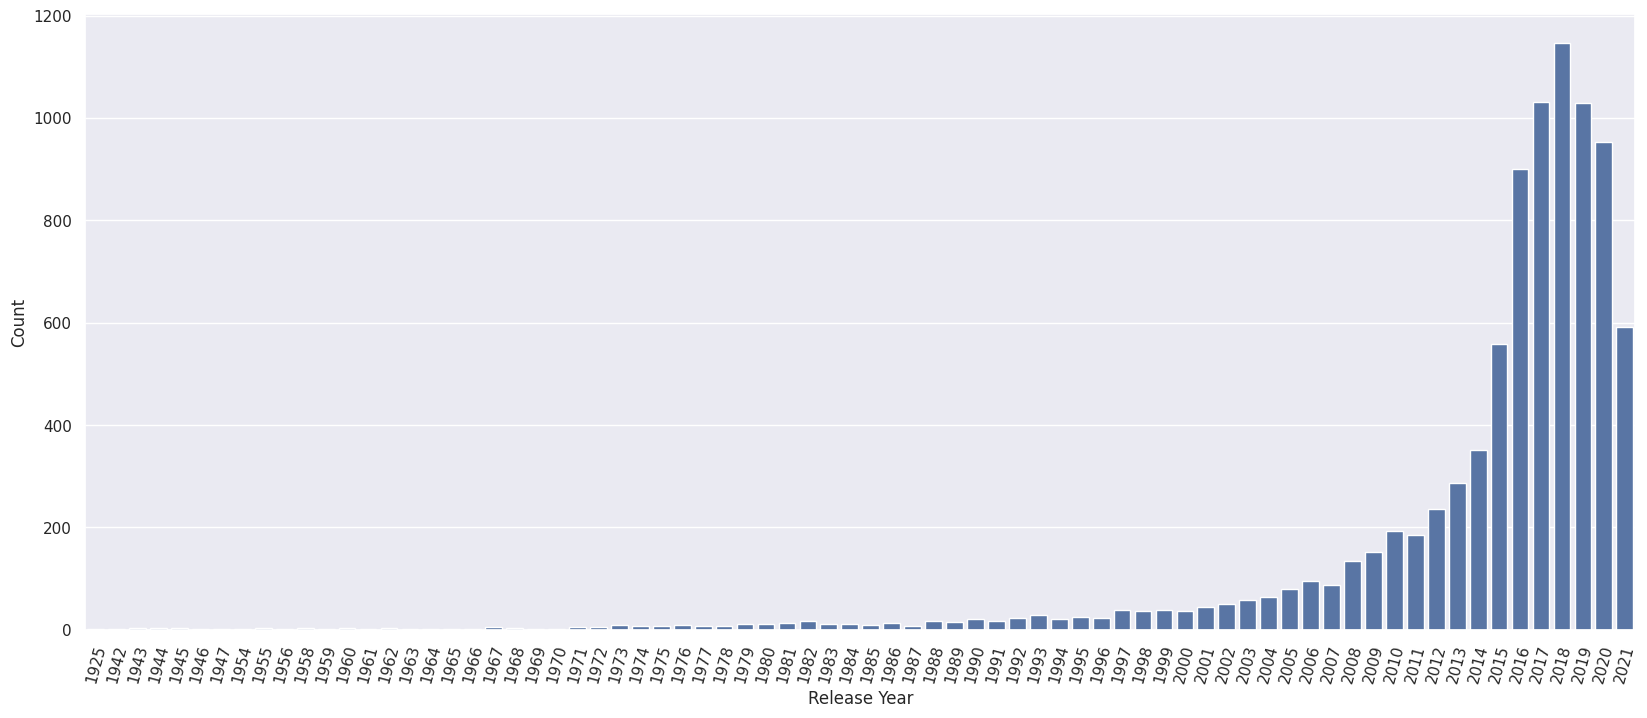

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=release_year_df, x='release_year',y='count')
plt.xticks(rotation=75)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

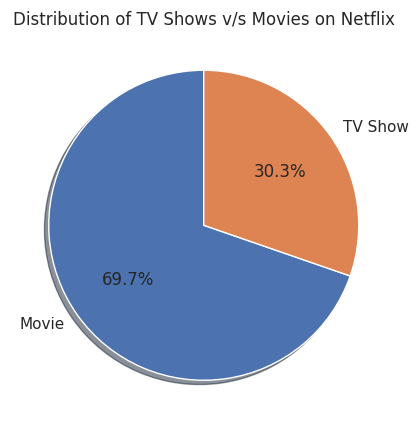

In [ ]:
types = df['type'].value_counts()
total = len(df)

distribution = types/total

plt.figure(figsize=(5,8))
plt.pie(distribution, labels=types.index,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Distribution of TV Shows v/s Movies on Netflix')
plt.show()

The pie chart visualization shows that approx 70% of the content on Netflix are movies, while the rest TV shows

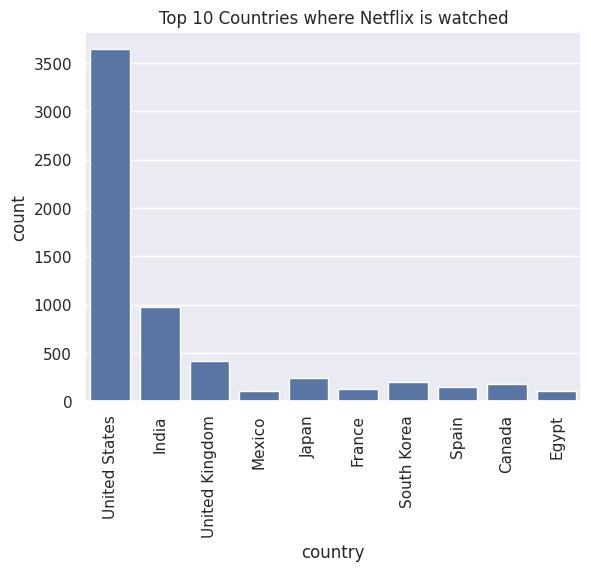

In [ ]:
top_countries = df['country'].value_counts().nlargest(10).index
sns.countplot(x='country', data=df[df['country'].isin(top_countries)])
plt.title('Top 10 Countries where Netflix is watched')
plt.xticks(rotation=90)
plt.show()

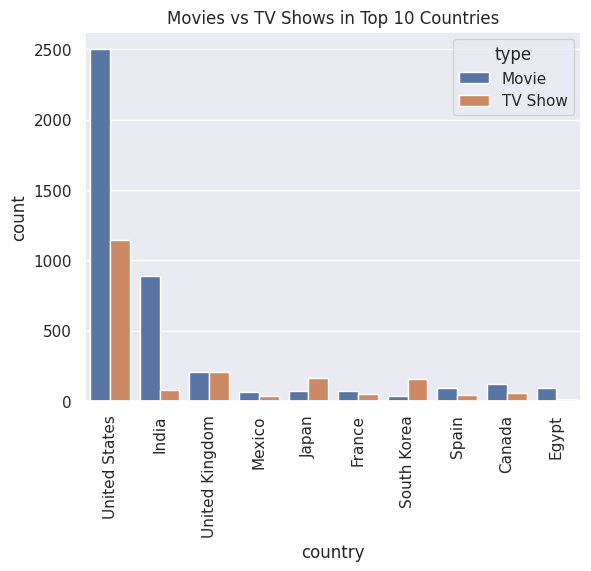

In [ ]:
# Checking what types of content is watched in the top 10 countries
sns.countplot(x='country', hue='type', data=df[df['country'].isin(top_countries)])
plt.title('Movies vs TV Shows in Top 10 Countries')
plt.xticks(rotation=90)
plt.show()

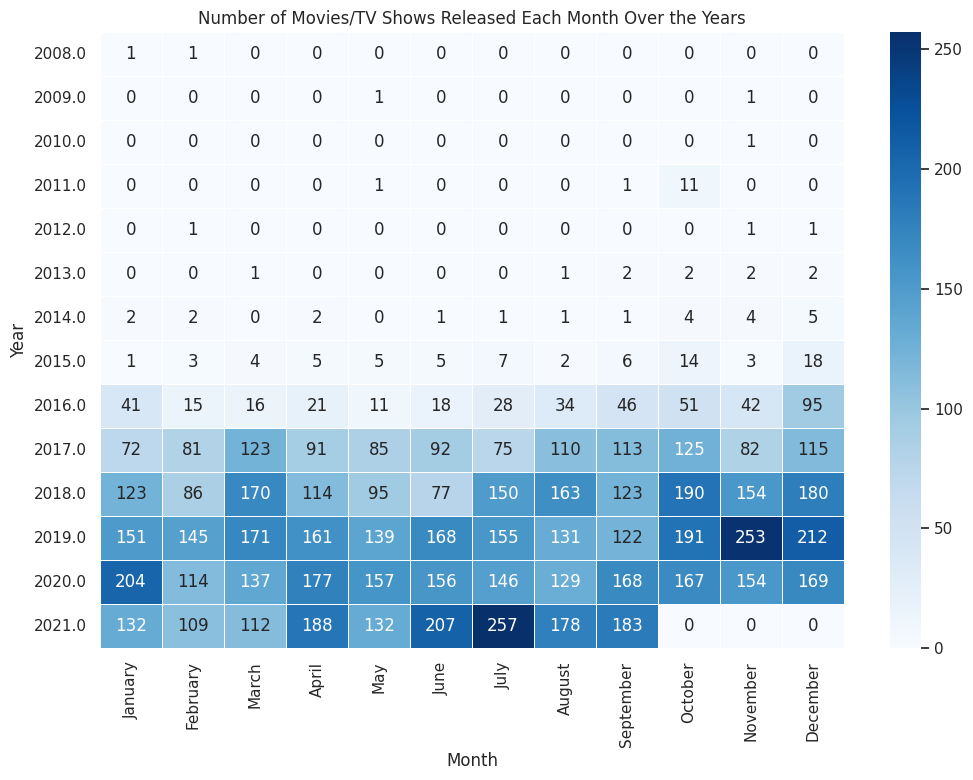

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# movies_df = df[df['type'] == 'Movie'].copy()

df.loc[:, 'year_added'] = df['date_added'].dt.year
df.loc[:, 'month_added'] = df['date_added'].dt.month_name()

movies_grouped = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
movies_grouped = movies_grouped[month_order]



plt.figure(figsize=(12, 8))
sns.heatmap(movies_grouped, cmap='Blues', linewidths=0.5, annot=True, fmt='d')

plt.title('Number of Movies/TV Shows Released Each Month Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
df_shows = df[df['type'] == 'TV Show']
df_exploded = df_shows.copy()
df_exploded['show_type'] = df['listed_in'].fillna('').str.split(', ')
df_exploded = df_exploded.explode('show_type')
df_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,show_type
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,International TV Shows
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,TV Dramas
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800,s8801,TV Show,Zindagi Gulzar Hai,No Data,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,December,Romantic TV Shows
8800,s8801,TV Show,Zindagi Gulzar Hai,No Data,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,December,TV Dramas
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July,Kids' TV
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July,Korean TV Shows


In [ ]:
df_exploded['show_type'].value_counts()

,count
show_type,
International TV Shows,1350
TV Dramas,762
TV Comedies,574
Crime TV Shows,469
Kids' TV,449
Docuseries,394
Romantic TV Shows,370
Reality TV,255
British TV Shows,252


Text(0, 0.5, 'Count')

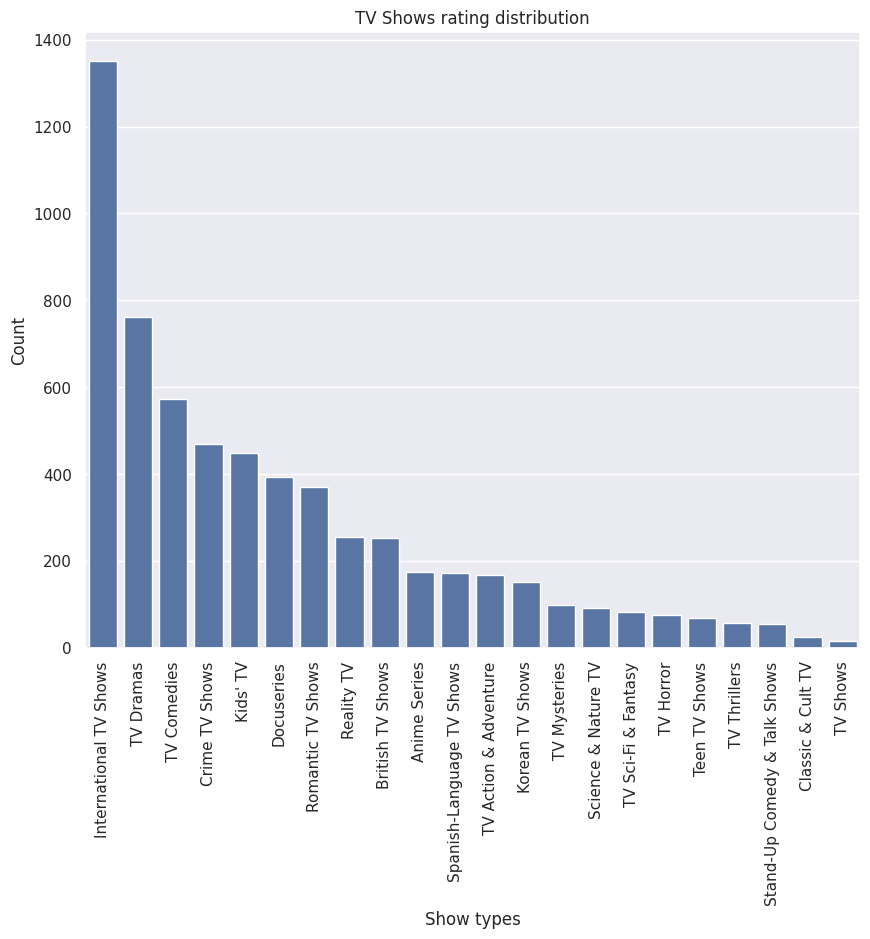

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_exploded, x='show_type', order=df_exploded['show_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('TV Shows rating distribution')
plt.xlabel("Show types")
plt.ylabel("Count")

In [ ]:
df_exploded['date_added'] = pd.to_datetime(df_exploded['date_added'])
df_exploded['month'] = df_exploded['date_added'].dt.month
df_exploded['year'] = df_exploded['date_added'].dt.year

In [ ]:
show_counts = df_exploded.groupby(['month', 'show_type']).size().reset_index(name='count')
show_counts

,month,show_type,count
0,1.0,Anime Series,10
1,1.0,British TV Shows,12
2,1.0,Classic & Cult TV,2
3,1.0,Crime TV Shows,25
4,1.0,Docuseries,30
...,...,...,...
254,12.0,TV Mysteries,9
255,12.0,TV Sci-Fi & Fantasy,6
256,12.0,TV Shows,2
257,12.0,TV Thrillers,8


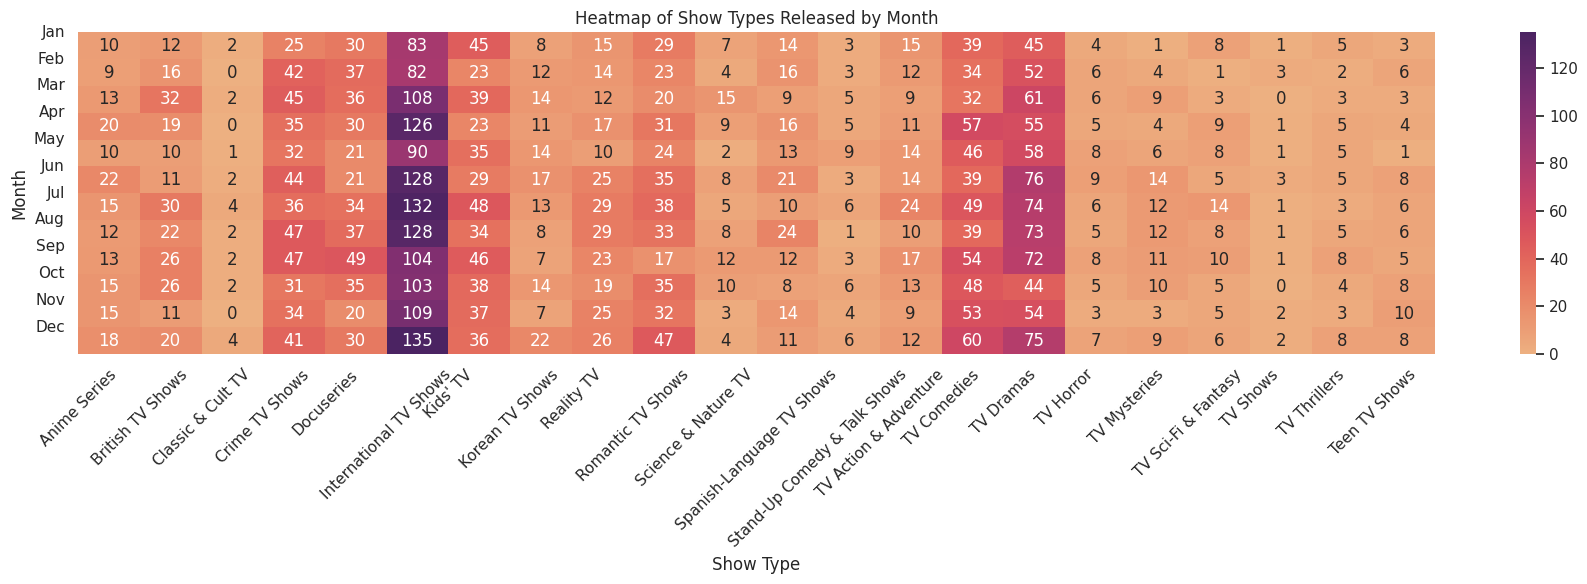

In [ ]:
plt.figure(figsize=(18, 6))
heatmap_data = show_counts.pivot_table(index='month', columns='show_type', values='count', fill_value=0)

sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='flare', cbar=True)

plt.title('Heatmap of Show Types Released by Month')
plt.xlabel('Show Type')
plt.ylabel('Month')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df_exploded_country = df_exploded.groupby(['country', 'show_type']).size().reset_index(name='count')
# df_exploded_country['country'].str.split(' ,').explode('country').str.split(' ,')[:50]
df_exploded_country['country'] = df_exploded_country['country'].str.split(', ')
df_exploded_country = df_exploded_country.explode('country')
df_exploded_country = df_exploded_country[df_exploded_country['country'].str.strip() != '']
df_exploded_country.head()

,country,show_type,count
0,South Korea,International TV Shows,1
1,South Korea,TV Dramas,1
2,Argentina,Classic & Cult TV,1
3,Argentina,Crime TV Shows,8
4,Argentina,Docuseries,1


In [ ]:
country_heatmap = df_exploded_country.pivot_table(index='country', columns='show_type', values='count', fill_value=0)
country_heatmap.head()

show_type,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,1.0,8.0,1.000000,8.0,3.0,0.0,1.0,2.0,...,0.0,0.0,2.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0
Australia,1.0,1.0,0.0,3.5,3.666667,6.2,2.0,0.0,11.0,1.5,...,0.0,1.0,5.333333,3.8,1.0,1.0,1.0,0.0,1.0,2.0
Austria,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Azerbaijan,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Belarus,0.0,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


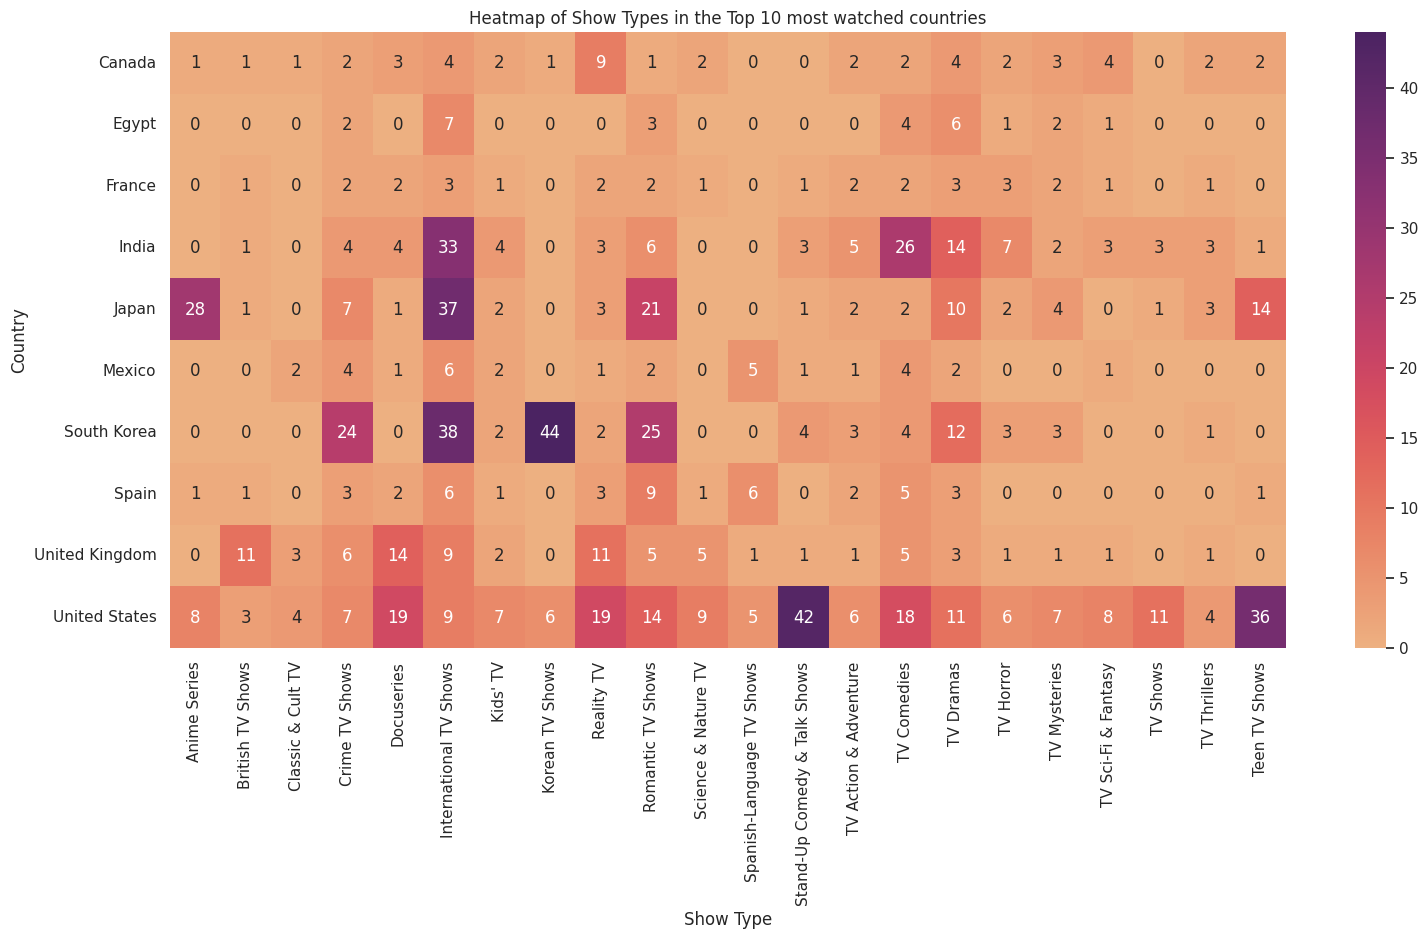

In [ ]:
plt.figure(figsize=(18, 8))
top_10_country_heatmap = country_heatmap[country_heatmap.index.isin(top_countries)].astype(int)
sns.heatmap(top_10_country_heatmap, annot=True, fmt='g', cmap='flare', cbar=True)

plt.title('Heatmap of Show Types in the Top 10 most watched countries')
plt.xlabel('Show Type')
plt.ylabel('Country')
plt.show()

In [ ]:
df_actor_exploded = df.copy()
df_actor_exploded['cast'] = df_actor_exploded['cast'].str.split(", ")
df_actor_exploded = df_actor_exploded.explode('cast')
df_actor_exploded = df_actor_exploded.loc[(df_actor_exploded['cast'] != "missing") & (df_actor_exploded['cast'].str.strip() != "")]
df_actor_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
1,s2,TV Show,Blood & Water,No Data,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
1,s2,TV Show,Blood & Water,No Data,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
1,s2,TV Show,Blood & Water,No Data,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,March
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,March
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,March
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,March


In [ ]:
actor_director_pair = df_actor_exploded.groupby(['director','cast', 'country']).size().reset_index(name='count')
actor_director_pair = actor_director_pair.loc[(actor_director_pair['director'] != "No Data") & (actor_director_pair['country'] != "No Data") & (actor_director_pair['count'] > 3)]
actor_director_pair

,director,cast,country,count
6300,Cathy Garcia-Molina,Al Tantay,Philippines,4
6343,Cathy Garcia-Molina,John Lloyd Cruz,Philippines,5
6345,Cathy Garcia-Molina,Joross Gamboa,Philippines,6
6350,Cathy Garcia-Molina,Kathryn Bernardo,Philippines,4
7647,Clay Glen,Emily Morris,Australia,4
...,...,...,...,...
56680,Toshiya Shinohara,Noriko Hidaka,Japan,5
56682,Toshiya Shinohara,Satsuki Yukino,Japan,7
58064,Wenn V. Deramas,Vice Ganda,Philippines,4
58302,Wilson Yip,Donnie Yen,"Hong Kong, China",4


In [ ]:
df_actor_type_exploded = df_actor_exploded.copy()
df_actor_type_exploded['listed_in'] = df_actor_type_exploded['listed_in'].str.split(", ")
df_actor_type_exploded = df_actor_type_exploded.explode('listed_in')
df_actor_type_exploded = df_actor_type_exploded.loc[(df_actor_type_exploded['cast'] != "No Data") & (df_actor_type_exploded['listed_in'] != "No Data") & ((df_actor_type_exploded['director'] != "No Data"))]
df_actor_type_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021-09-24,2021,TV-MA,1 Season,International TV Shows,To protect his family from a powerful drug lor...,2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021-09-24,2021,TV-MA,1 Season,TV Action & Adventure,To protect his family from a powerful drug lor...,2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,United States,2021-09-24,2021,TV-MA,1 Season,International TV Shows,To protect his family from a powerful drug lor...,2021.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,March
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019.0,March
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019.0,March
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,March


In [ ]:
df_actor_cast_count = df_actor_type_exploded.groupby(['cast','listed_in']).size().reset_index(name='count')
df_max_actor_type = df_actor_cast_count.iloc[df_actor_cast_count['count'].nlargest(10).index]
df_max_actor_type


,cast,listed_in,count
6268,Anupam Kher,International Movies,38
64692,Shah Rukh Khan,International Movies,32
6266,Anupam Kher,Dramas,28
50855,Naseeruddin Shah,Dramas,28
64691,Shah Rukh Khan,Dramas,28
1925,Akshay Kumar,International Movies,27
50857,Naseeruddin Shah,International Movies,27
53494,Om Puri,International Movies,27
35480,Julie Tejwani,Children & Family Movies,26
10107,Boman Irani,International Movies,25


In [ ]:
df_director_type_count = df_actor_type_exploded.groupby(['director','listed_in']).size().reset_index(name='count')
df_max_director_type = df_director_type_count.iloc[df_director_type_count['count'].nlargest(10).index]
df_max_director_type

,director,listed_in,count
1557,Cathy Garcia-Molina,International Movies,125
7543,Rajiv Chilaka,Children & Family Movies,119
5858,Martin Scorsese,Dramas,105
10094,Youssef Chahine,Dramas,104
2166,David Dhawan,Comedies,90
5093,Kunle Afolayan,International Movies,87
1556,Cathy Garcia-Molina,Dramas,86
10096,Youssef Chahine,International Movies,86
1558,Cathy Garcia-Molina,Romantic Movies,81
2441,Don Michael Paul,Action & Adventure,79


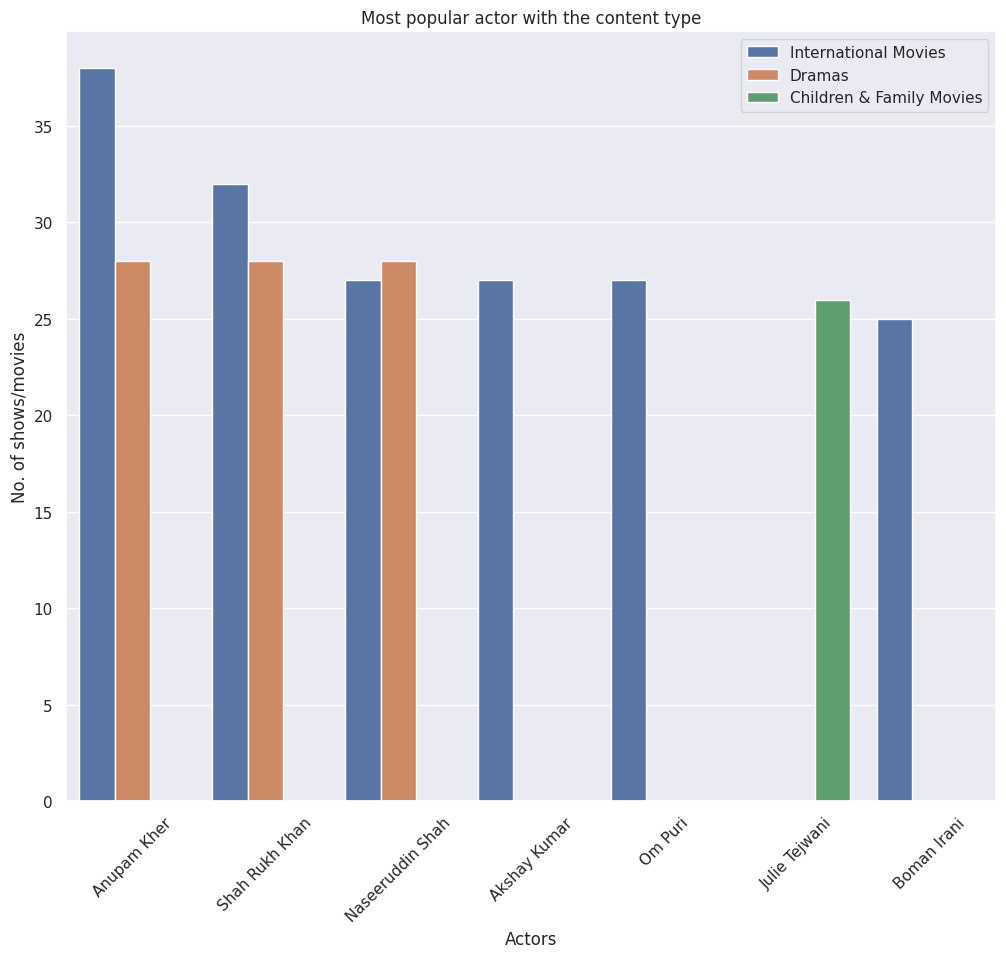

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(data=df_max_actor_type, x='cast', y='count', hue='listed_in')
plt.xticks(rotation=45)
plt.xlabel("Actors")
plt.ylabel("No. of shows/movies")
plt.title("Most popular actor with the content type")
plt.legend(fancybox=True)
plt.show()

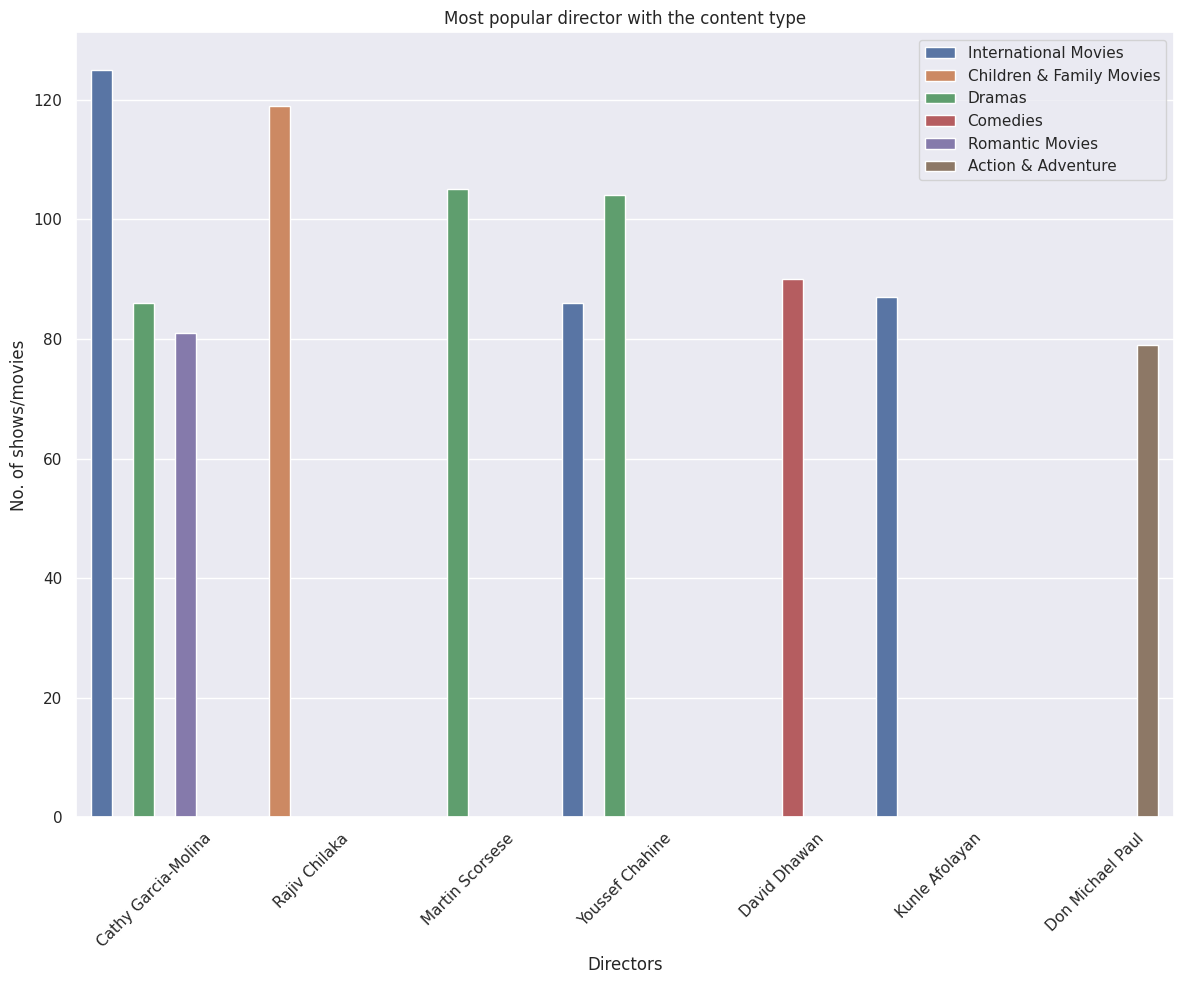

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(data=df_max_director_type, x='director', y='count', hue='listed_in')
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("No. of shows/movies")
plt.title("Most popular director with the content type")
plt.legend(fancybox=True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(data=df_max_director_type, x='director', y='count', hue='listed_in')
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("No. of shows/movies")
plt.title("Most popular director with the content type")
plt.legend(fancybox=True)
plt.tight_layout()
plt.show()

In [ ]:
df_movie_show_year = df.copy()
df_movie_show_year['year'] = df_movie_show_year['date_added'].dt.year
df_movie_show_year[['type','year']]

,type,year
0,Movie,2021.0
1,TV Show,2021.0
2,TV Show,2021.0
3,TV Show,2021.0
4,TV Show,2021.0
...,...,...
8802,Movie,2019.0
8803,TV Show,2019.0
8804,Movie,2019.0
8805,Movie,2020.0


In [ ]:
df_movie_show_year_grouped = df_movie_show_year.groupby(['year', 'type']).size().reset_index(name='count')
df_movie_show_year_grouped['year'] = df_movie_show_year_grouped['year'].astype(int)

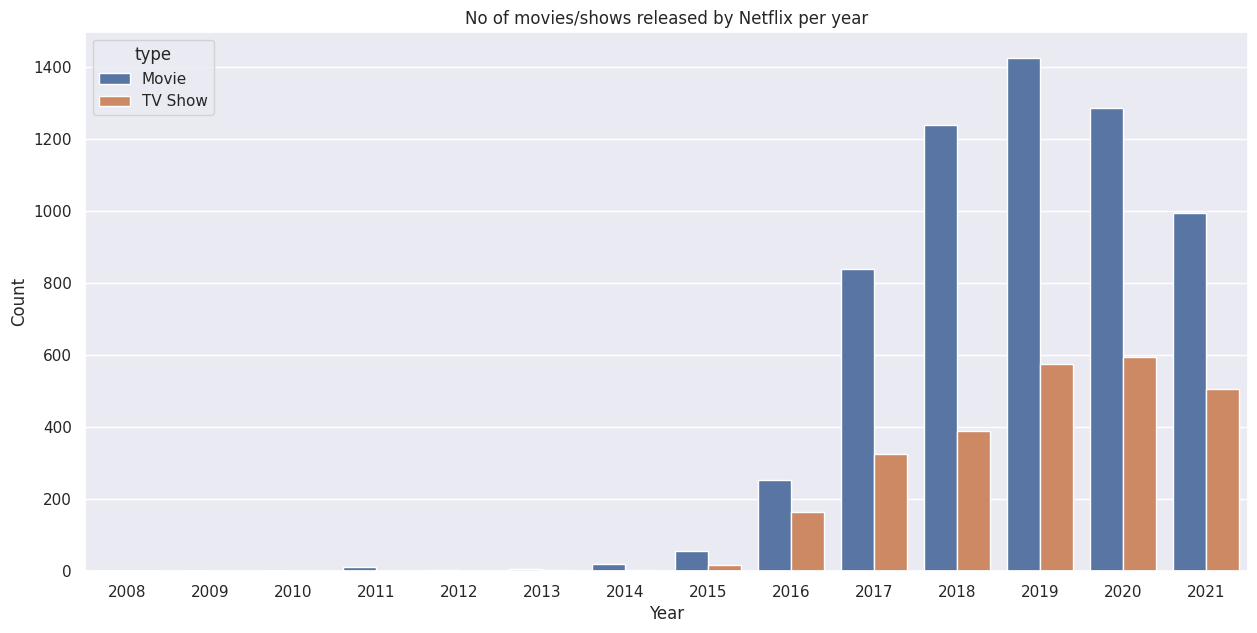

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df_movie_show_year_grouped.sort_values('year'), x='year', y='count', hue='type')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("No of movies/shows released by Netflix per year")
plt.show()

<ipython-input-108-4739e60c53bb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration_movies['duration'] = df_duration_movies['duration'].apply(clean_duration)


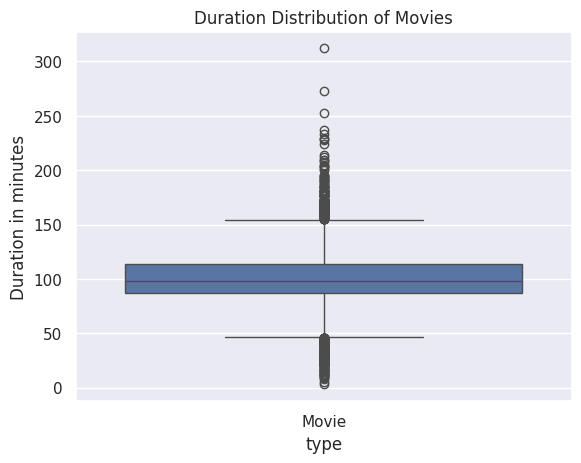

In [ ]:
df_duration = df.copy()

df_duration['duration'] = df_duration['duration'].fillna('missing')

df_duration_movies = df_duration.loc[(df_duration['type'] == 'Movie') & (df_duration['duration'] != 'missing')]

def clean_duration(x):
    if x == 'missing':
        return np.nan
    else:
        return int(x.split()[0])

df_duration_movies['duration'] = df_duration_movies['duration'].apply(clean_duration)

df_duration_movies

sns.boxplot(x='type', y='duration', data=df_duration_movies)
plt.title('Duration Distribution of Movies')
plt.ylabel("Duration in minutes")
plt.show()

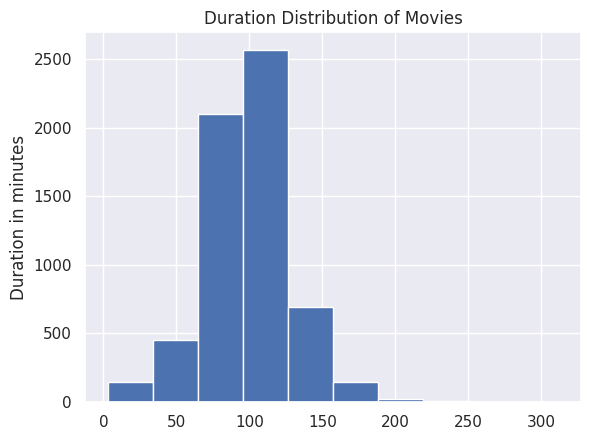

In [ ]:
plt.hist(df_duration_movies['duration'], bins=10)
plt.title('Duration Distribution of Movies')
plt.ylabel("Duration in minutes")
plt.show()

<Axes: xlabel='release_year', ylabel='duration'>

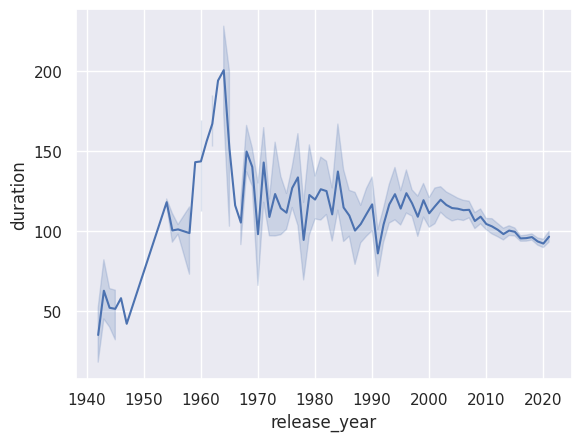

In [ ]:
sns.lineplot(data=df_duration_movies, x='release_year', y='duration')

<ipython-input-110-9b46ab355403>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration_shows['duration'] = df_duration_shows['duration'].apply(clean_duration)


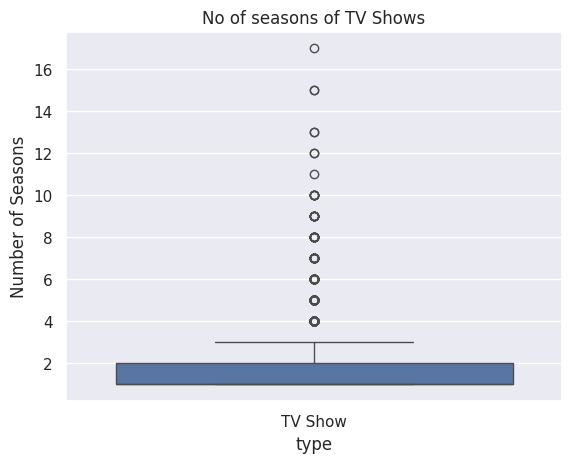

In [ ]:
df_duration_shows = df_duration.loc[(df_duration['type'] == 'TV Show') & (df_duration['duration'] != 'missing')]

def clean_duration(x):
    if x == 'missing':
        return np.nan
    else:
        return int(x.split()[0])

df_duration_shows['duration'] = df_duration_shows['duration'].apply(clean_duration)

df_duration_shows

sns.boxplot(x='type', y='duration', data=df_duration_shows)
plt.title('No of seasons of TV Shows')
plt.ylabel("Number of Seasons")
plt.show()

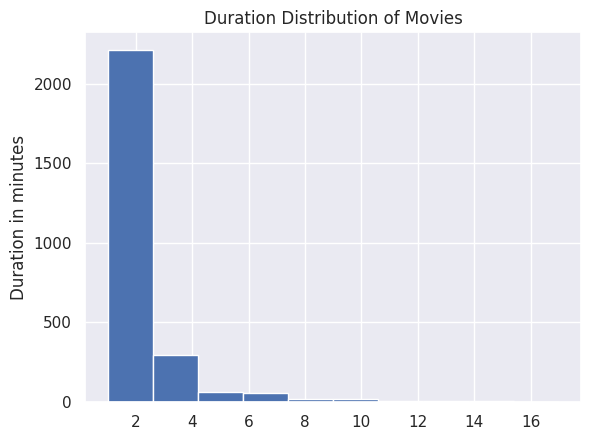

In [ ]:
plt.hist(df_duration_shows['duration'], bins=10)
plt.title('Duration Distribution of Movies')
plt.ylabel("Duration in minutes")
plt.show()

<Axes: xlabel='release_year', ylabel='duration'>

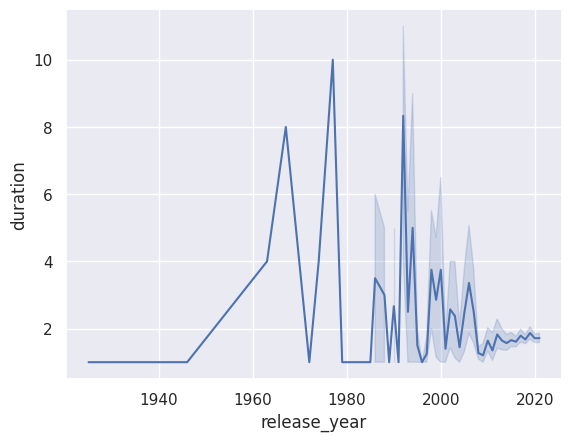

In [ ]:
sns.lineplot(data=df_duration_shows, x='release_year', y='duration')

<ipython-input-60-41e3ba750eec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['year_added'] = df_movies['date_added'].dt.year
<ipython-input-60-41e3ba750eec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['year_added'] = df_tv_shows['date_added'].dt.year


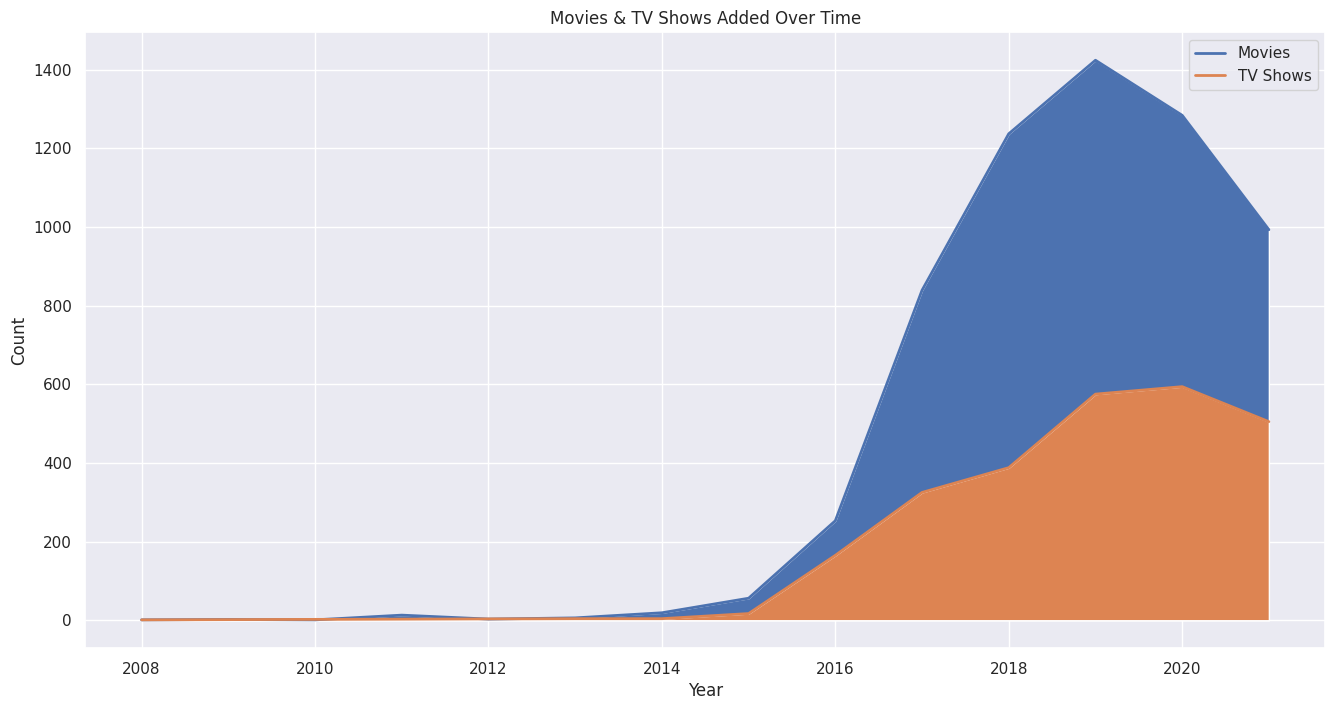

In [ ]:
# TV and Movies added over time

df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

df_movies['year_added'] = df_movies['date_added'].dt.year
df_tv_shows['year_added'] = df_tv_shows['date_added'].dt.year

movies_count = df_movies['year_added'].value_counts().sort_index()
tv_shows_count = df_tv_shows['year_added'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
plt.plot(movies_count.index, movies_count.values,
label='Movies', linewidth=2)
plt.plot(tv_shows_count.index, tv_shows_count.values,
label='TV Shows', linewidth=2)

plt.fill_between(movies_count.index, movies_count.values, )
plt.fill_between(tv_shows_count.index, tv_shows_count.values, )

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()
plt.show()

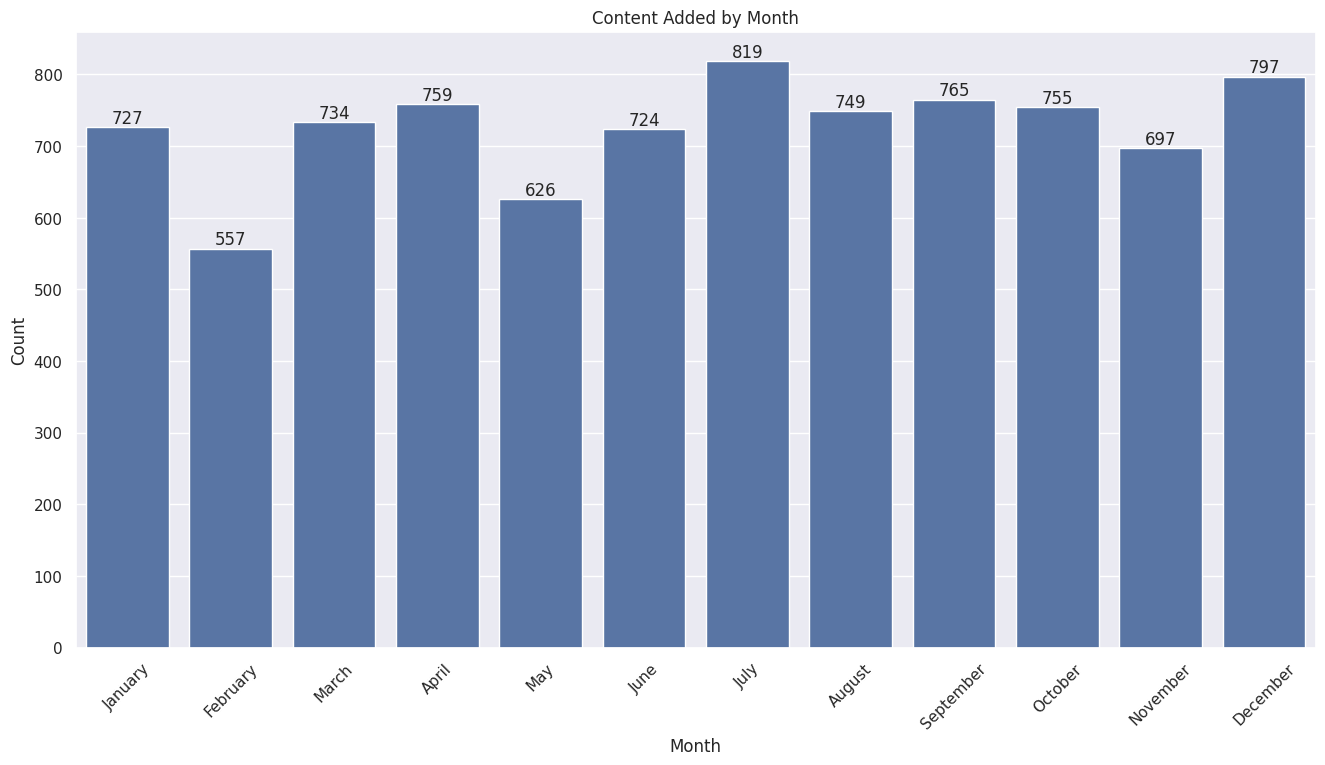

In [ ]:

df['month_added'] = pd.to_datetime(df['date_added']).dt.month_name()


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']


monthly_counts = df['month_added'].value_counts().loc[month_order]

max_count = monthly_counts.max()

plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x=monthly_counts.index, y=monthly_counts.values)


plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content Added by Month')


for index, value in enumerate(monthly_counts.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()